In [ ]:
#linear regression
#evaluation metrics (4)
#Ridge Regression
    #evaluation metrics (4)
#Lasso Regression
#eval
#Support Vector Regression
#eval
#Decision Tree Regression
#Random FOrest Regression



step 5: compare ther results



In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#data pre-processing
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#numrical data
#categorical data
#data cleaning

dataset.isnull().sum()




age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
dataset = pd.get_dummies(dataset)

In [18]:
dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


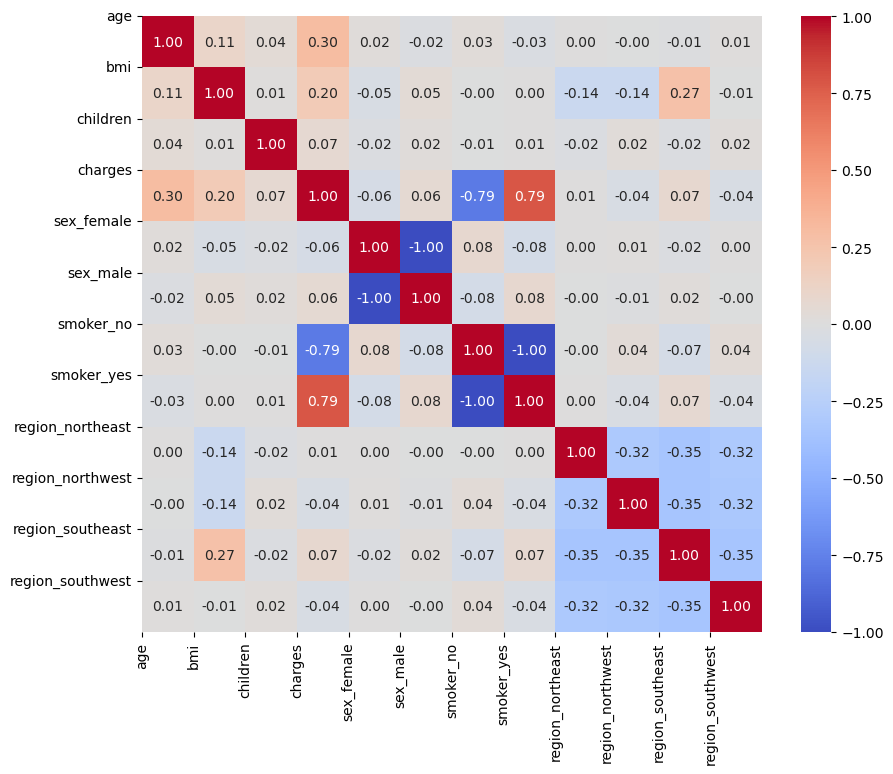

In [19]:
#corr

#person 3
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, cmap = 'coolwarm', annot = True, fmt = '.2f' )
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


In [20]:
X = dataset.drop('charges', axis = 1).values
y = dataset['charges'].values.reshape(-1,1)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)


In [26]:
X_train.shape

(1003, 11)

In [25]:
y_test.shape

(335, 1)

In [27]:
#linear regression

from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [28]:
print(linear.score(X_train, y_train))

0.7449555328228536


In [29]:
#evaluation metrics for regression analysis 

#mean squared error
#RMSE
#MAE
#R2

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

#person 2
cv_linear = cross_val_score(estimator = linear, X = X, y = y, cv = 10)

y_pred_linear_test = linear.predict(X_test)
r2_score = r2_score(y_test, y_pred_linear_test)

In [35]:
r2_score

0.7672642952734358

In [37]:
from sklearn.metrics import mean_squared_error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

In [38]:
rmse

5926.023602394468

In [61]:
#ridge regression
#preson 1

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

steps = [('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Lasso())]

lasso_pipeline = Pipeline(steps)

In [72]:
parameters = {'model__alpha': [0.1, 0.2, 0.3]}

In [73]:
from sklearn.model_selection import GridSearchCV
#RadomizedSearchCV
lasso_reg  = GridSearchCV(lasso_pipeline, parameters, cv = 10)

In [74]:
#lasso regression

In [75]:
lasso_reg.fit(X,y.ravel())  0.5

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scalar', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': [0.1, 0.2, 0.3]})

In [76]:
score = lasso_reg.best_score_

In [77]:
score

0.8362597686049096

In [80]:
#supportvector regression 
 
sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_sclaed = sc_y.fit_transform(y.reshape(-1, 1))

In [81]:
from sklearn.svm import SVR

svr = SVR()

In [83]:
#girdsearch 


parameters = {'kernel': ['rbf', 'sigmoid'],
             'C': [0.0001, 0.1]}



In [84]:
svr_reg  = GridSearchCV(svr, parameters, cv = 10)

In [87]:
svr_reg.fit(X_scaled,y_sclaed.ravel())

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.0001, 0.1], 'kernel': ['rbf', 'sigmoid']})

In [89]:
svr_reg.best_score_

0.792393188843632

In [ ]:
#evaluation metricd

In [ ]:
#decision tree regression
parameters = ['max_depth': [5, 10, 15]]

In [ ]:
TP, TN, FP, FN
Accuracy
Prevalence
Sensitivity and Specificity
AUC

In [ ]:
from sklearn.metrics import f1_score